In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import numpy as np
import pandas as pd

In [12]:
seeds = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, names=['A','P','C','lkern', 'wkern', 'asym','lgro','gr'])
seeds.head()
                    

,A,P,C,lkern,wkern,asym,lgro,gr
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [13]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of
    # axes instances, if it is not a list,
    # it puts it in one
    
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

In [14]:
gr1 = seeds.gr == 1
gr2 = seeds.gr == 2
gr3 = seeds.gr == 3


In [15]:
pars = ['A','C','P','asym','lgro','lkern','wkern']

NameError: name 'axes_flatten' is not defined

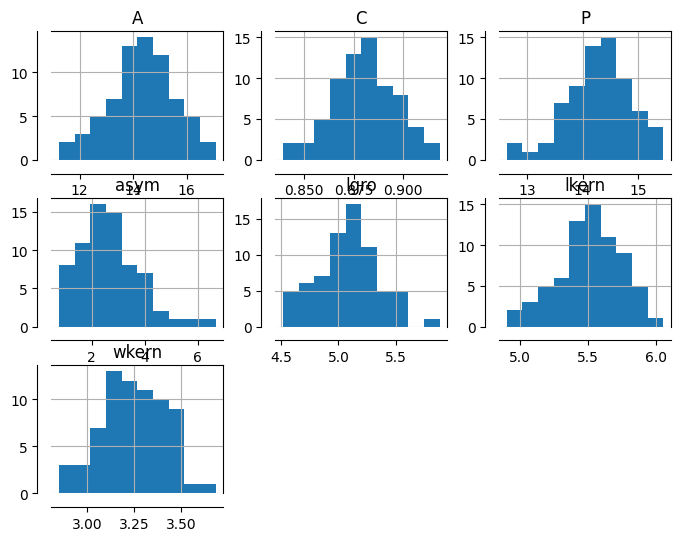

In [17]:
axes = seeds[pars][gr1].hist(figsize=(8,6))
despine(list(axes.flatten()))
_ = [ax.grid() for ax in list(axes_flatten())]
_ = [ax.locator_params(axis='x', nbins=4) for ax in list(axes.flatten())]
_ = [ax.locator_params(axis='y', nbins=2) for ax in list(axes.flatten())]
plt.subplots_adjust(wspace=0.5, hspace=0.7)
        
        

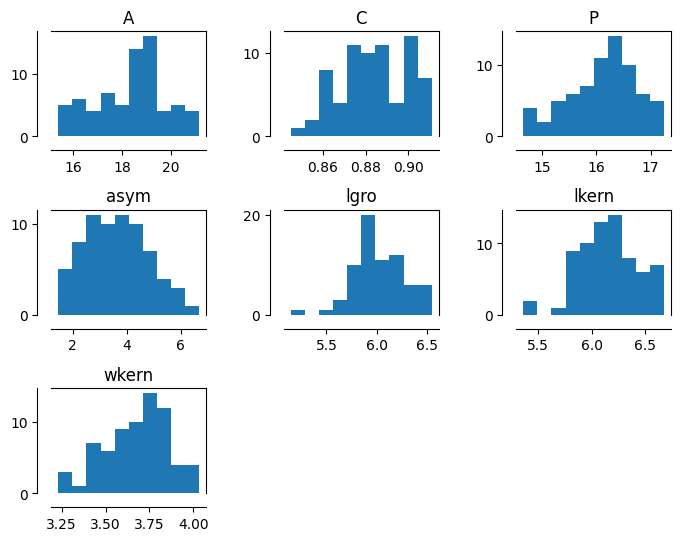

In [18]:
axes = seeds[pars][gr2].hist(figsize=(8,6))
despine(list(axes.flatten()))
_ = [ax.grid() for ax in list(axes.flatten())]
_ = [ax.locator_params(axis='x', nbins=4) for ax in
list(axes.flatten())]
_ = [ax.locator_params(axis='y', nbins=2) for ax in
list(axes.flatten())]
plt.subplots_adjust(wspace=0.5, hspace=0.7)

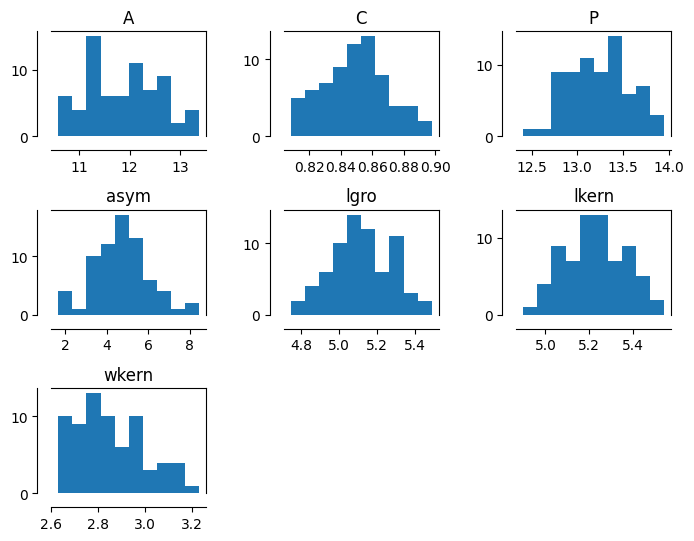

In [19]:
axes = seeds[pars][gr3].hist(figsize=(8,6))
despine(list(axes.flatten()))
_ = [ax.grid() for ax in list(axes.flatten())]
_ = [ax.locator_params(axis='x', nbins=5) for ax in
list(axes.flatten())]
_ = [ax.locator_params(axis='y', nbins=2) for ax in
list(axes.flatten())]
plt.subplots_adjust(wspace=0.5, hspace=0.7)

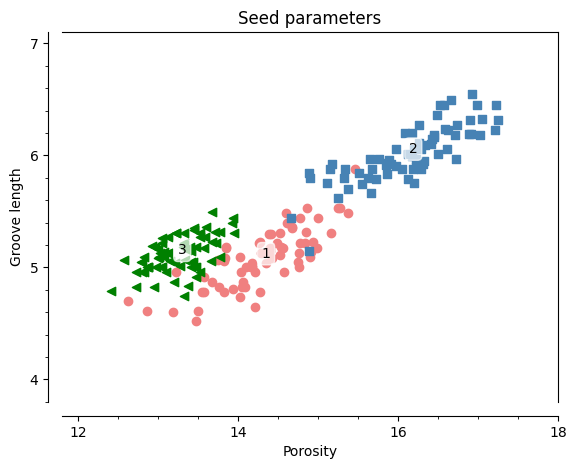

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(seeds.P[gr1], seeds.lgro[gr1], color='LightCoral')
ax.scatter(seeds.P[gr2], seeds.lgro[gr2], color='SteelBlue', marker='s')
ax.scatter(seeds.P[gr3], seeds.lgro[gr3], color='Green', marker='<')
ax.text(seeds.P[gr1].mean(), seeds.lgro[gr1].mean(), '1', bbox=dict(color='w',alpha=0.7, boxstyle="Round"))
ax.text(seeds.P[gr2].mean(), seeds.lgro[gr2].mean(),'2', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
ax.text(seeds.P[gr3].mean(), seeds.lgro[gr3].mean(), '3', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
ax.set_xlabel('Porosity')
ax.set_ylabel('Groove length')
ax.set_title('Seed parameters')
despine(ax)
plt.minorticks_on()
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=4)
ax.set_xlim(11.8,18)
ax.set_ylim(3.8,7.1)

In [31]:
X_raw = seeds.values
X_pre, labels = X_raw[:,:-1], X_raw[:,-1]

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X_best = SelectKBest(chi2, k=2).fit_transform(X_pre, labels)

In [34]:
X_best[:5]


array([[15.26 ,  2.221],
       [14.88 ,  1.018],
       [14.29 ,  2.699],
       [13.84 ,  2.259],
       [16.14 ,  1.355]])

In [35]:
seeds.head()

,A,P,C,lkern,wkern,asym,lgro,gr
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


(-0.6, 10.0)

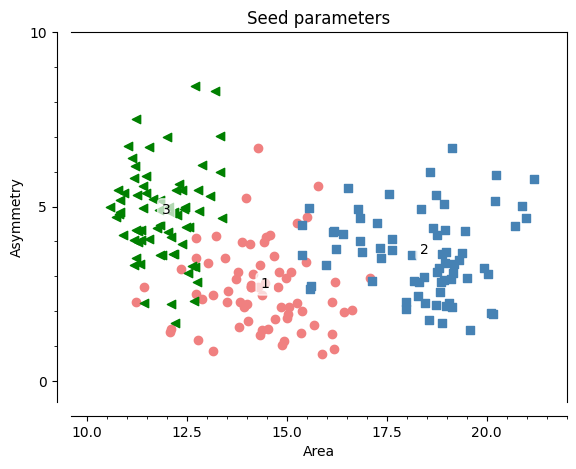

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(seeds.A[gr1], seeds.asym[gr1],color='LightCoral')
ax.text(seeds.A[gr1].mean(), seeds.asym[gr1].mean(), '1', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
ax.scatter(seeds.A[gr2], seeds.asym[gr2], color='SteelBlue', marker='s')
ax.text(seeds.A[gr2].mean(), seeds.asym[gr2].mean(), '2', bbox=dict(color='w', alpha=0.7,boxstyle="Round"))
ax.scatter(seeds.A[gr3], seeds.asym[gr3], color='Green', marker='<')
ax.text(seeds.A[gr3].mean(), seeds.asym[gr3].mean(), '3', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Seed parameters')
despine(ax)
plt.minorticks_on()
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=3)
ax.set_xlim(9.6,22)
ax.set_ylim(-0.6,10)

In [37]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

Classifying the data

In [44]:
res = 0.01
#X, y = X_best[::2], labels[::2]
X, y = X_best, labels
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                     np.arange(y_min, y_max, res))

def plot_results(clf, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    xxyy = np.vstack((xx.flatten(), yy.flatten())).T
    Z = clf.predict(xxyy)
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors=['Green','LightCoral','SteelBlue'], alpha=0.7, zorder=-1)
    ax.scatter(seeds.A[gr1], seeds.asym[gr1], color='LightCoral')
    ax.scatter(seeds.A[gr2], seeds.asym[gr2],     color='SteelBlue', marker='s')
    ax.scatter(seeds.A[gr3], seeds.asym[gr3],     color='Green', marker='<')
    ax.text(seeds.A[gr1].mean(), seeds.asym[gr1].mean(), '1', bbox=dict(color='w', alpha=0.7,boxstyle="Round"))
    ax.text(seeds.A[gr2].mean(), seeds.asym[gr2].mean(), '2', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
    ax.text(seeds.A[gr3].mean(), seeds.asym[gr3].mean(), '3', bbox=dict(color='w', alpha=0.7, boxstyle="Round"))
    despine(ax)
    plt.minorticks_on()
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=3)
    ax.set_xlabel('Area')
    ax.set_ylabel('Asymmetry')
    ax.set_title(title, size=10)
    ax.set_xlim(9.6,22)
    ax.set_ylim(-0.6,10)
    
    

The SVC linear kernel

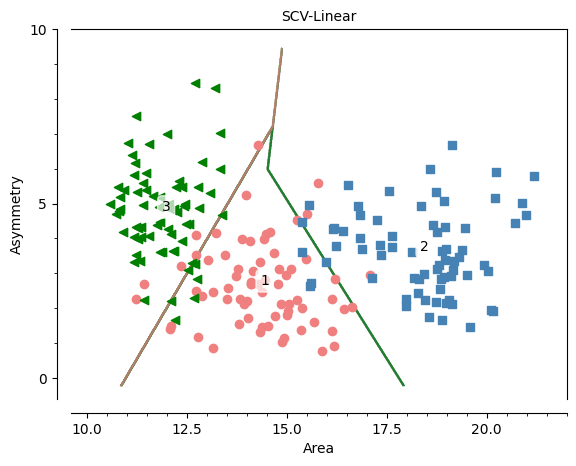

In [45]:
svc = svm.SVC(kernel='linear', C=1.).fit(X, y)
plot_results(svc, 'SCV-Linear')

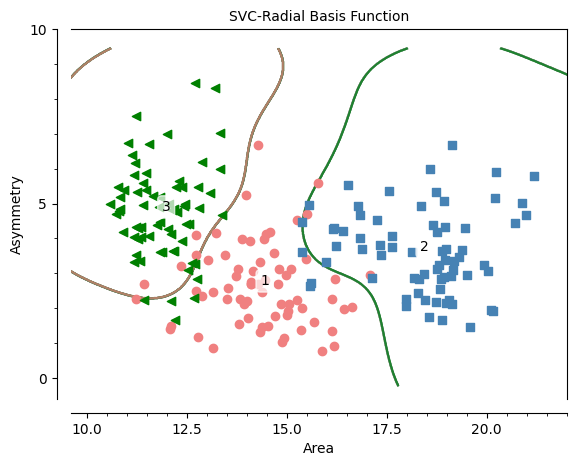

In [46]:
#The SVC Radial Basis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.4, C=1.).fit(X, y)
plot_results(rbf_svc, 'SVC-Radial Basis Function')

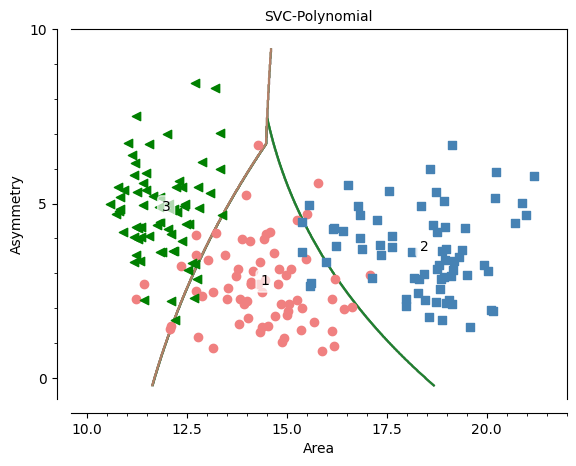

In [47]:
#The SVC polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.).fit(X, y)
plot_results(poly_svc, 'SVC-Polynomial')

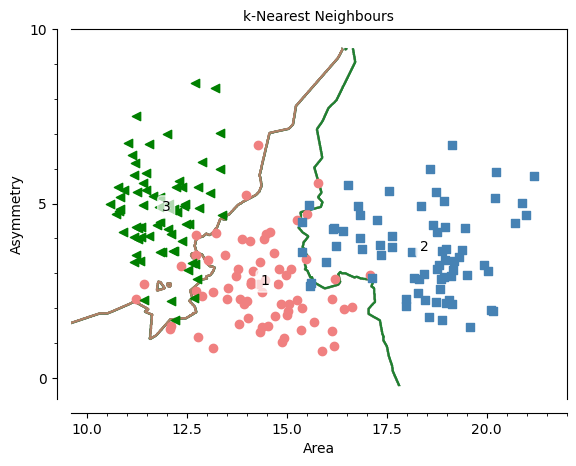

In [49]:
#K-Nearest Neighbour
knn = KNeighborsClassifier(weights = 'uniform',n_neighbors=5).fit(X, y)
plot_results(knn, 'k-Nearest Neighbours')

/root/tutorial-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


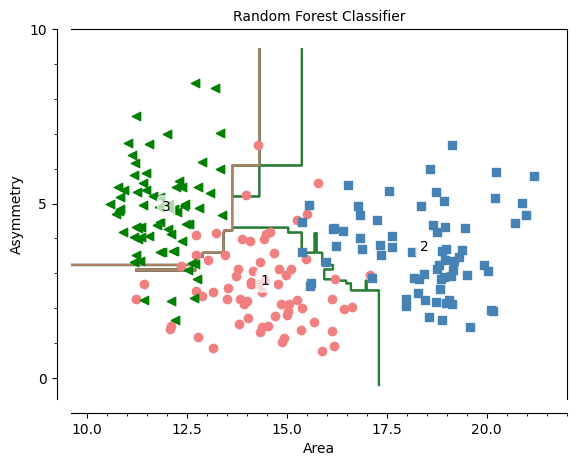

In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=10, max_features='auto').fit(X, y)
plot_results(rfc, 'Random Forest Classifier')